# Elemental Matplotlib

In [1]:
import matplotlib.pyplot as plt

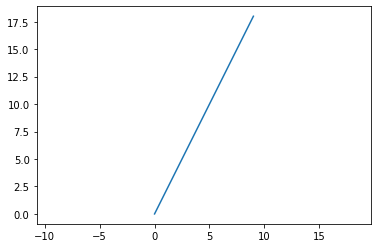

In [2]:
x = range(0,10)
y = [2*value for value in x]

plt.plot(x,y)
plt.axis('equal')
plt.show()

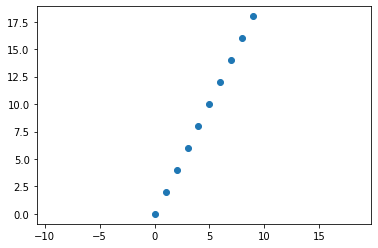

In [3]:
x = range(0,10)
y = [2*value for value in x]

plt.scatter(x,y)
plt.axis('equal')
plt.show()

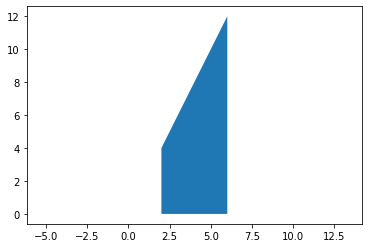

In [4]:
def is_in_interval(number, minimum, maximum): return minimum <= number <= maximum 

x = range(0,10)
y = [2*value for value in x]
where = [is_in_interval(value,2,6) for value in x]

plt.fill_between(x,y, where=where)
plt.axis('equal')
plt.show()

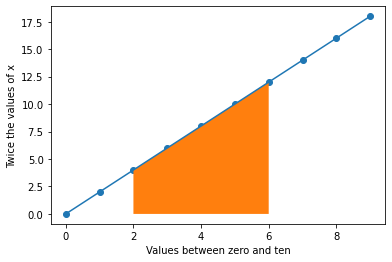

In [5]:
def is_in_interval(number, minimum, maximum): return minimum <= number <= maximum 

x = range(0,10)
y = [2*value for value in x]
where = [is_in_interval(value,2,6) for value in x]

plt.plot(x,y)
plt.scatter(x,y)
plt.fill_between(x,y, where=where)
plt.xlabel('Values between zero and ten')
plt.ylabel('Twice the values of x')
plt.show()

# Plotting probabilities: implementación 1

Problema: se tiene una moneda balanceada. Se lanza la moneda 10 veces. Plotear la probabilidad de que salga cara 8 veces o más.

In [6]:
from itertools import product
from collections import defaultdict


# 1. Definición sample space
pos = {'H','T'}
sample_space = set(product(pos,repeat=10))

# 2. Defino event condition
def at_least_eight(outcome): return (sum([res == 'H' for res in outcome]) > 7)

# 3. Defino función generadora de eventos
def get_matching_event(event_condition, sample_space):
    return set([outcome for outcome in sample_space if event_condition(outcome)])

# 4. Defino función de cálculo de probabilidad
def compute_prob(event_condition, sample_space):
    event = get_matching_event(event_condition, sample_space)

    if type(sample_space) == type(set()):
        return len(event)/len(sample_space)

    else:
        event_size = sum([sample_space[outcome] for outcome in event])
        total_repetitions = sum(sample_space.values())
        return event_size/total_repetitions

# example
print(compute_prob(at_least_eight,sample_space))


0.0546875


In [7]:
# 5. Defino sample space reducido
sample_space_red = defaultdict(int)

for outcome in sample_space:
    total = sum([res == 'H' for res in outcome])
    sample_space_red[total] += 1

sample_space_red

defaultdict(int,
            {5: 252,
             6: 210,
             3: 120,
             7: 120,
             8: 45,
             4: 210,
             2: 45,
             1: 10,
             9: 10,
             10: 1,
             0: 1})

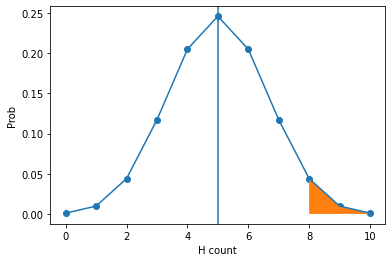

In [8]:
# 6. Construyo gráfica

x_10 = list(sample_space_red.keys())
x_10.sort()
y_10 = [sample_space_red[key] for key in x_10]
sample_space_size = len(sample_space)
y_10_prob = [value/sample_space_size for value in y_10]
where = [x > 7 for x in x_10]

plt.plot(x_10, y_10_prob)
plt.scatter(x_10,y_10_prob)
plt.fill_between(x_10, y_10_prob, where=where)
plt.axvline(x = 5)
plt.xlabel('H count')
plt.ylabel('Prob')
plt.show()

# Implementación 2: multiples distribuciones

Se quieren comparar distribuciones de probabilidad en 2 experimentos: 1 asociado a lanzar 10 veces una moneda, y otro asociado a lanzar 20 veces la moneda. La pregunta a responder es: ¿Como se comparan las probabilidades de obtener un evento extremo en ambos experimentos, definiendo como *evento extremo* a obtener menos de un 20% de caras o más de un 80%?

In [9]:
from itertools import product
from collections import defaultdict

# 1. Defino sample space red
pos = {'H','T'}
sample_space_20 = set(product(pos, repeat=20))

sample_space_red_20 = defaultdict(int)
for outcome in sample_space_20:
    total = sum([res == 'H' for res in outcome])
    sample_space_red_20[total] += 1

In [10]:
x_20 = list(sample_space_red_20.keys())
x_20.sort()
y_20 = [sample_space_red_20[key] for key in x_20]
sample_space_size_20 = len(sample_space_20)
y_20_prob = [val/sample_space_size_20 for val in y_20]

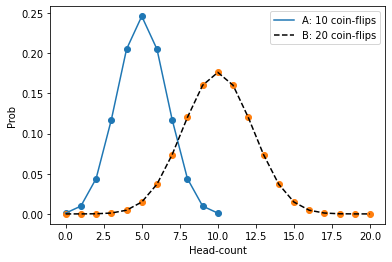

In [11]:
plt.plot(x_10, y_10_prob, label = 'A: 10 coin-flips')
plt.scatter(x_10, y_10_prob)
plt.plot(x_20,y_20_prob, color = 'black', linestyle = '--', label = 'B: 20 coin-flips')
plt.scatter(x_20,y_20_prob)
plt.xlabel('Head-count')
plt.ylabel('Prob')
plt.legend()
plt.show()

Las gráficas anteriores son correctas, pero el problema es su comparabilidad. Para poder comparar gráficamente las distribuciones deben *alinearse*, lo que es posible realizando dos transformaciones: normalización del eje X y transformación prob -> relative likelihood para el eje y.

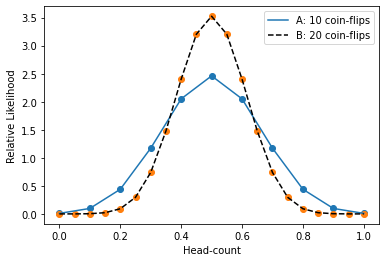

In [12]:
x_10_freq = [val/10 for val in x_10]
x_20_freq = [val/20 for val in x_20]
rel_like_10 = [10*val for val in y_10_prob]
rel_like_20 = [20*val for val in y_20_prob]

plt.plot(x_10_freq, rel_like_10, label = 'A: 10 coin-flips')
plt.scatter(x_10_freq, rel_like_10)
plt.plot(x_20_freq,rel_like_20, color = 'black', linestyle = '--', label = 'B: 20 coin-flips')
plt.scatter(x_20_freq,rel_like_20)
plt.xlabel('Head-count')
plt.ylabel('Relative Likelihood')
plt.legend()
plt.show()

Para el experimento de lanzar 10 veces la moneda, la probabilidad de obtener un evento extremo es más alta que lanzando 20 veces la moneda. Lanzando más veces la moneda, además, aumenta la probabilidad de obtener un evento intermedio.